# Titanic

### 1. Objective
***The objective of this project is to predict the survival of the passengers provided in the test data***

### 2. Collecting Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_palette("BrBG")

In [3]:
train = pd.read_csv('Input/train.csv')
test = pd.read_csv('Input/test.csv')

#### Exploring the Data

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


To check no. of NaN records

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


To check no. of NaN records

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 3. Exploratory Data Analysis
Lets check relation of Survival/Dead to the fields provided in the test set

In [31]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

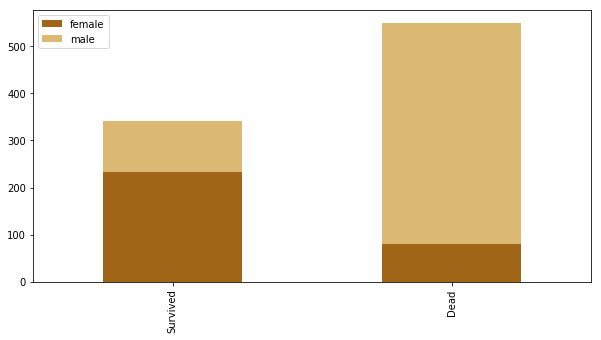

In [11]:
bar_chart('Sex')

**Analysis:** 
- Women more likely survived than men

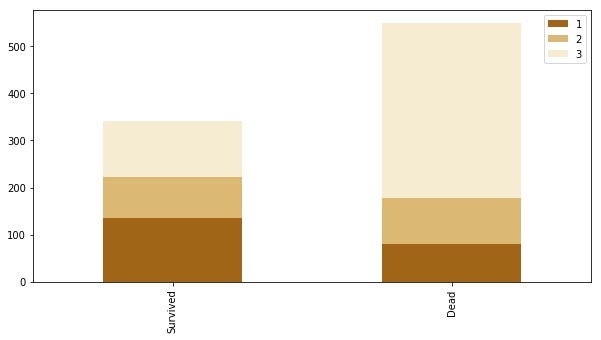

In [12]:
bar_chart('Pclass')

**Analysis:** 
- 1st class passengers more likely survived than others
- 3rd class passengers more likely died.

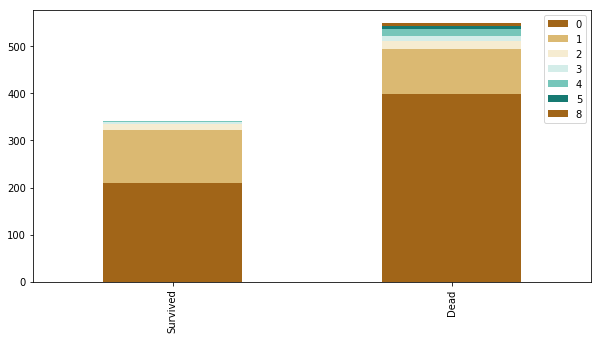

In [13]:
bar_chart('SibSp')

**Analysis:** 
- Passengers who boarded with more than 2 siblings/spouses more likely survived 
- Passengers who boarded alone more likely died.

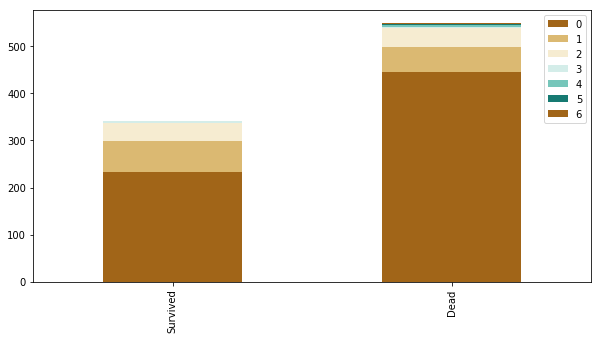

In [14]:
bar_chart('Parch')

**Analysis:** 
- Passengers who boarded with or more than 2 parents/children more likely survived 
- Passengers who boarded alone more likely died.

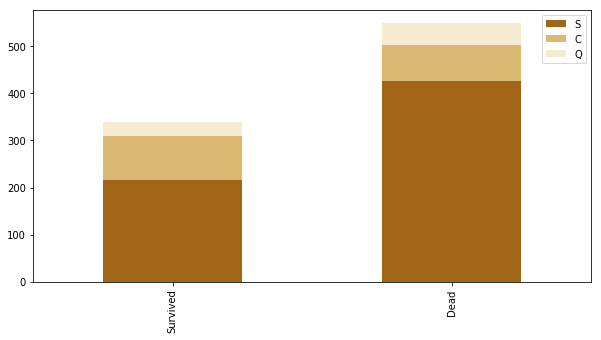

In [32]:
bar_chart('Embarked')

**Analysis:** 
- Passengers who boarded from C more likely survived than died.
- Passengers who boarded from S and Q more likely died.

### 4. Data Wrangling and Feature Engineering

#### 4.1 Name

In [16]:
for dataset in [train, test]:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [33]:
train['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

In [18]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

##### Title mapping as
Mr : 0  
Miss : 1  
Mrs: 2  
Others: 3

In [19]:
for dataset in [train,test]:
    dataset['Title'] = dataset['Title'].apply(lambda x: 0 if x=='Mr' else (1 if x=='Miss' else (2 if x=='Mrs' else 3)))

In [34]:
train['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

In [35]:
test['Title'].value_counts()

0    240
1     78
2     72
3     28
Name: Title, dtype: int64

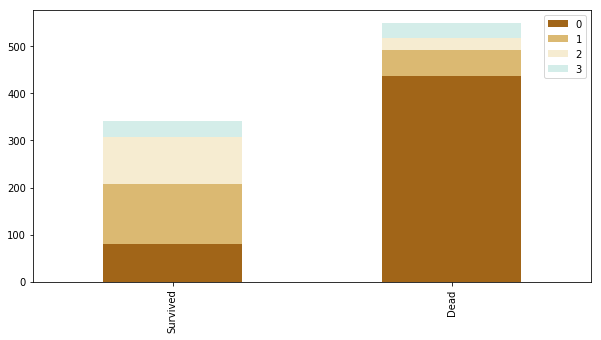

In [22]:
bar_chart('Title')

###### Now removing unnecessary column Name

In [23]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [36]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0


In [25]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


#### 4.2 Sex

##### Mapping Sex as
Female:0, Male:1

In [26]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [27]:
train['Sex'] = lb.fit_transform(train['Sex'])
test['Sex'] = lb.transform(test['Sex'])

In [37]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0


In [38]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,1,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,0,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,1,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,1,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,0,22.0,1,1,3101298,12.2875,NaN,S,2


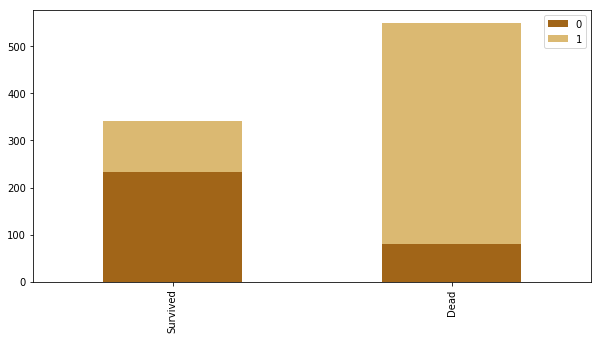

In [30]:
bar_chart('Sex')

#### 4.3 Age

##### ** Let's use Title's median age for missing Age **

In [45]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [46]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [44]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace = True)
test['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace = True)

In [34]:
train[train['Age'].isnull()].count()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [35]:
test[test['Age'].isnull()].count()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

##### Visualising survival w.r.t ages

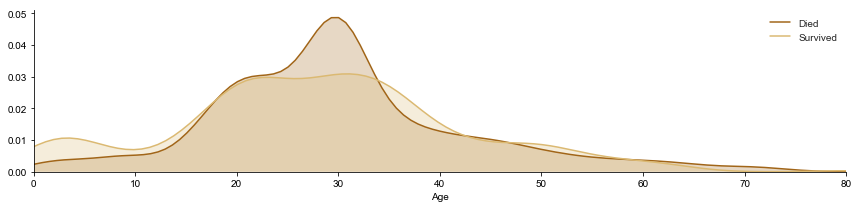

In [36]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
sns.set_style('whitegrid')
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
plt.legend(['Died','Survived'])
plt.show()

### 5. Binning/Data categorisation

**feature vector map:**
- child(<=16): 0
- young(>16-<=26): 1
- adult(>26-<=36): 2
- mid-age(>36-<=62): 3
- senior(>62): 4

#### 5.1 Age

In [37]:
for dataset in [train,test]:
    dataset.loc[dataset['Age']<=16,'Age'] = 0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age'] = 1
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36),'Age'] = 2
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62),'Age'] = 3
    dataset.loc[dataset['Age']>62,'Age'] = 4

In [38]:
train['Age'].value_counts()

2.0    336
1.0    255
3.0    180
0.0    105
4.0     15
Name: Age, dtype: int64

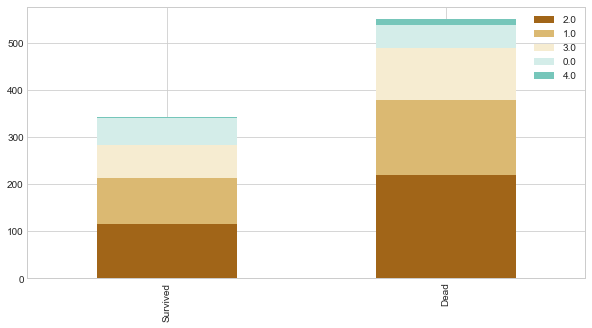

In [39]:
bar_chart('Age')

#### 5.2 Embarked

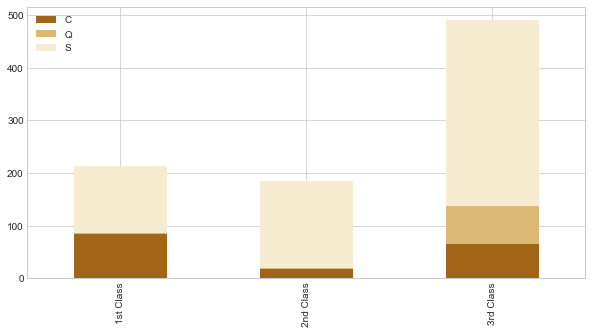

In [40]:
PC1 = train[train['Pclass']==1]['Embarked'].value_counts()
PC2 = train[train['Pclass']==2]['Embarked'].value_counts()
PC3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([PC1,PC2,PC3])
df.index = ['1st Class', '2nd Class', '3rd Class']
df.plot(kind='bar',stacked=True,figsize = (10,5))

#### Analysis:
    - more than 50% in all classes have embarked from S

###### So then, lets fill out the missing datas in 'Embark' with S

In [41]:
for df in [train,test]:
    df['Embarked'] = df['Embarked'].fillna('S')

In [42]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


###### Now categorising Embark field as

- C = 0
- Q = 1
- S = 2

In [43]:
test[test['Embarked'].isnull()].count()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [44]:
le = LabelEncoder()
train['Embarked'] = le.fit_transform(train['Embarked'])
test['Embarked'] = le.transform(test['Embarked'])

In [45]:
test['Embarked'].value_counts()

2    270
0    102
1     46
Name: Embarked, dtype: int64

In [46]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,2,0
1,2,1,1,0,3.0,1,0,PC 17599,71.2833,C85,0,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,2,2
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,2,0


#### 5.3 Fare

filling the null values with the median fare for each Pclass

In [47]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace=True)

In [48]:
train[train['Fare'].isnull()].count()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

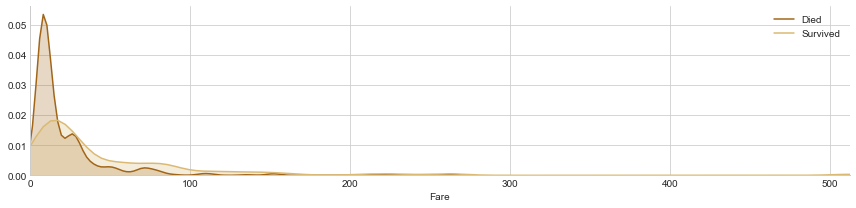

In [49]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(train['Fare'].min(),train['Fare'].max()))
plt.legend(['Died','Survived'])
plt.show()

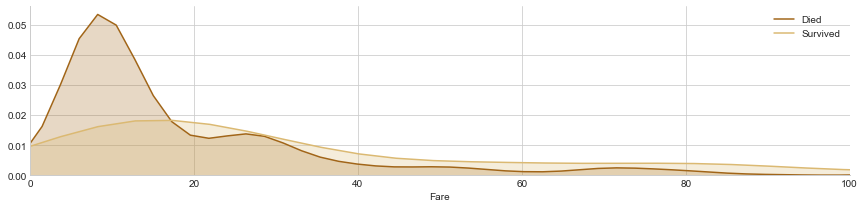

In [50]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(train['Fare'].min(),100))
plt.legend(['Died','Survived'])
plt.show()

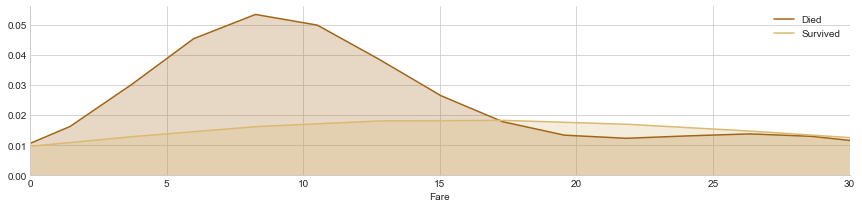

In [51]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,30))
plt.legend(['Died','Survived'])
plt.show()

In [52]:
for df in [train,test]:
    df.loc[df['Fare'] <= 17, 'Fare'] = 0,
    df.loc[(df['Fare'] > 17) & (df['Fare'] <= 30), 'Fare'] = 1,
    df.loc[(df['Fare'] > 30) & (df['Fare'] <= 100), 'Fare'] = 2,
    df.loc[df['Fare'] > 100, 'Fare'] = 3

In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C,C,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C,S,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0


#### 5.4 Cabin

In [50]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [49]:
for df in [train,test]:
    df['Cabin'] = df['Cabin'].str[:1]

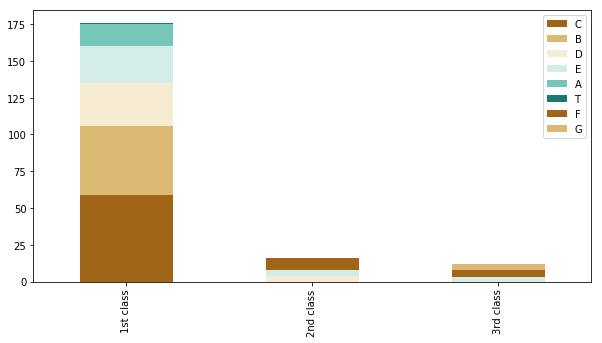

In [52]:
Pc1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pc2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pc3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pc1,Pc2,Pc3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [57]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in [train,test]:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [58]:
train['Cabin'].unique()

array([nan, 0.8, 1.6, 2.4, 1.2, 0. , 0.4, 2. , 2.8])

#### filling missing Fare with median fare for each Pclass

In [59]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,2.0,2,0
1,2,1,1,0,3.0,1,0,PC 17599,2.0,0.8,0,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,0.0,2.0,2,1
3,4,1,1,0,2.0,1,0,113803,2.0,0.8,2,2
4,5,0,3,1,2.0,0,0,373450,0.0,2.0,2,0


#### 5.5 FamilySize

In [61]:
train['FamilySize'] = train['SibSp']+train['Parch']+1
test['FamilySize'] = test['SibSp']+test['Parch']+1

In [62]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,2.0,2,0,2
1,2,1,1,0,3.0,1,0,PC 17599,2.0,0.8,0,2,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,0.0,2.0,2,1,1
3,4,1,1,0,2.0,1,0,113803,2.0,0.8,2,2,2
4,5,0,3,1,2.0,0,0,373450,0.0,2.0,2,0,1


(0, 11.0)

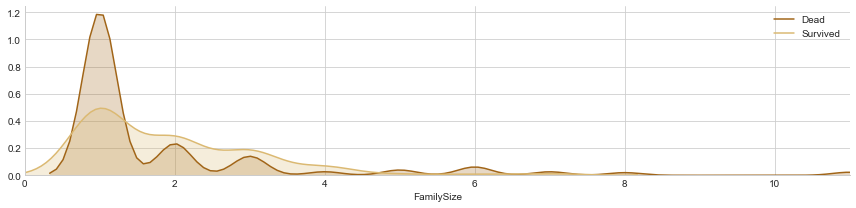

In [63]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
plt.legend(['Dead','Survived'])
plt.xlim(0)

In [64]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in [train,test]:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [65]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,2.0,2,0,0.4
1,2,1,1,0,3.0,1,0,PC 17599,2.0,0.8,0,2,0.4
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,0.0,2.0,2,1,0.0
3,4,1,1,0,2.0,1,0,113803,2.0,0.8,2,2,0.4
4,5,0,3,1,2.0,0,0,373450,0.0,2.0,2,0,0.0


In [66]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,1,2.0,0,0,330911,0.0,2.0,1,0,0.0
1,893,3,0,3.0,1,0,363272,0.0,2.0,2,2,0.4
2,894,2,1,3.0,0,0,240276,0.0,2.0,1,0,0.0
3,895,3,1,2.0,0,0,315154,0.0,2.0,2,0,0.0
4,896,3,0,1.0,1,1,3101298,0.0,2.0,2,2,0.8


###### Now removing unnecessary columns

In [67]:
features_drop = ['Ticket','SibSp','Parch']
train.drop(features_drop+['PassengerId'],axis=1, inplace=True)
test.drop(features_drop,axis=1, inplace=True)

In [68]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,1,1.0,0.0,2.0,2,0,0.4
1,1,1,0,3.0,2.0,0.8,0,2,0.4
2,1,3,0,1.0,0.0,2.0,2,1,0.0
3,1,1,0,2.0,2.0,0.8,2,2,0.4
4,0,3,1,2.0,0.0,2.0,2,0,0.0


In [69]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,1,2.0,0.0,2.0,1,0,0.0
1,893,3,0,3.0,0.0,2.0,2,2,0.4
2,894,2,1,3.0,0.0,2.0,1,0,0.0
3,895,3,1,2.0,0.0,2.0,2,0,0.0
4,896,3,0,1.0,0.0,2.0,2,2,0.8


In [70]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [71]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,1,1.0,0.0,2.0,2,0,0.4
1,1,0,3.0,2.0,0.8,0,2,0.4
2,3,0,1.0,0.0,2.0,2,1,0.0
3,1,0,2.0,2.0,0.8,2,2,0.4
4,3,1,2.0,0.0,2.0,2,0,0.0


### 6. Modelling

Importing Classifier modules

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

CrossValidation (K-fold)

In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle=True, random_state=0)

##### 6.1 KNN

In [83]:
clf = KNeighborsClassifier(n_neighbors=20)
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs=1, scoring = 'accuracy')
score

array([0.8       , 0.76404494, 0.78651685, 0.80898876, 0.87640449,
       0.82022472, 0.83146067, 0.80898876, 0.79775281, 0.83146067])

KNN score

In [84]:
round(np.mean(score)*100, 2)

81.26

##### 6.2 Decision Tree

In [85]:
clf = DecisionTreeClassifier(criterion='entropy')
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring ='accuracy')
score

array([0.78888889, 0.79775281, 0.79775281, 0.78651685, 0.86516854,
       0.7752809 , 0.83146067, 0.82022472, 0.74157303, 0.79775281])

Decision Tree score

In [86]:
round(np.mean(score)*100, 2)

80.02

##### 6.3 Random Forest

In [81]:
clf= RandomForestClassifier(n_estimators =20, criterion = 'entropy')
score =  cross_val_score(clf, train_data, target,cv=k_fold,n_jobs=1,scoring='accuracy')
score

array([0.82222222, 0.82022472, 0.79775281, 0.75280899, 0.86516854,
       0.82022472, 0.82022472, 0.82022472, 0.75280899, 0.80898876])

Random forest score

In [82]:
round(np.mean(score)*100,2)

80.81

##### 6.4 Naive Bayes

In [89]:
clf = GaussianNB()
score = cross_val_score(clf, train_data, target, cv=k_fold,n_jobs=1, scoring='accuracy')
score

array([0.85555556, 0.75280899, 0.76404494, 0.75280899, 0.70786517,
       0.80898876, 0.78651685, 0.79775281, 0.85393258, 0.83146067])

Naive Bayes score

In [90]:
round(np.mean(score)*100,2)

79.12

##### 6.5 SVM

In [91]:
clf = SVC()
score = cross_val_score(clf, train_data, target, cv=k_fold,n_jobs=1, scoring='accuracy')
score

array([0.82222222, 0.80898876, 0.82022472, 0.82022472, 0.84269663,
       0.82022472, 0.83146067, 0.85393258, 0.84269663, 0.86516854])

SVC score

In [92]:
round(np.mean(score)*100,2)

83.28

##### Since, SVM is providing the best score, hence we'll use SVM as our model to predict the outcomes

### 7. Testing

In [93]:
test_data = test.drop('PassengerId',axis=1).copy()

In [95]:
test_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,1,2.0,0.0,2.0,1,0,0.0
1,3,0,3.0,0.0,2.0,2,2,0.4
2,2,1,3.0,0.0,2.0,1,0,0.0
3,3,1,2.0,0.0,2.0,2,0,0.0
4,3,0,1.0,0.0,2.0,2,2,0.8


In [96]:
clf = SVC()
clf.fit(train_data, target)
predictions = clf.predict(test_data)

In [104]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived':predictions})
submission.to_csv('Output\Titanic_submission.csv', index=False)

In [102]:
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
